# Project On Bike Sharing Dataset

About the Bike Sharing Dataset
Overview
Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return back has become automatic. Through these systems, the user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which are composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real-world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure, and arrival position is explicitly recorded in these systems. This feature turns the bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of the important events in the city could be detected via monitoring these data.

Attribute Information
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

instant: record index
dteday : date
season : season (1:springer, 2:summer, 3:fall, 4:winter)
yr : year (0: 2011, 1:2012)
mnth : month ( 1 to 12)
hr : hour (0 to 23)
holiday : weather day is holiday or not
weekday : day of the week
workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
weathersit :
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
temp: Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
hum: Normalized humidity. The values are divided to 100 (max)
windspeed: Normalized wind speed. The values are divided to 67 (max)
casual: count of casual users
registered: count of registered users
cnt: count of total rental bikes including both casual and registered

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [2]:
data=pd.read_csv('day.csv',parse_dates=['dteday'])
data.head(7)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510


# EDA  on the dataset

In [3]:
data.drop(['instant'],axis=1,inplace=True)

In [4]:
data.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Enhancing the analysis by exloring the dteday feature of the data set

Decomposing the dates in day, month and year and further classifing day as weekday or weekend for better EDA

In [6]:
df=pd.DataFrame()
df['Month']=data['dteday'].dt.month_name()
df['year']=data['dteday'].dt.year
df['day']=data['dteday'].dt.day_name()
df['type_of_day']=np.where((df['day']=='Sunday')|(df['day']=='Saturday'),'Weekend','Weekday')
df

,Month,year,day,type_of_day
0,January,2011,Saturday,Weekend
1,January,2011,Sunday,Weekend
2,January,2011,Monday,Weekday
3,January,2011,Tuesday,Weekday
4,January,2011,Wednesday,Weekday
...,...,...,...,...
726,December,2012,Thursday,Weekday
727,December,2012,Friday,Weekday
728,December,2012,Saturday,Weekend
729,December,2012,Sunday,Weekend


# Merging the two dataframes

In [43]:
df_final = pd.concat([df, data], axis=1, sort=False)
df_final.drop(['dteday'],axis=1,inplace =True)
df_final

,Month,year,day,type_of_day,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,January,2011,Saturday,Weekend,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,January,2011,Sunday,Weekend,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,January,2011,Monday,Weekday,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,January,2011,Tuesday,Weekday,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,January,2011,Wednesday,Weekday,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,December,2012,Thursday,Weekday,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,December,2012,Friday,Weekday,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,December,2012,Saturday,Weekend,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,December,2012,Sunday,Weekend,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


# Exploring The Data

In [12]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 18 columns):
Month          731 non-null object
year           731 non-null int64
day            731 non-null object
type_of_day    731 non-null object
season         731 non-null int64
yr             731 non-null int64
mnth           731 non-null int64
holiday        731 non-null int64
weekday        731 non-null int64
workingday     731 non-null int64
weathersit     731 non-null int64
temp           731 non-null float64
atemp          731 non-null float64
hum            731 non-null float64
windspeed      731 non-null float64
casual         731 non-null int64
registered     731 non-null int64
cnt            731 non-null int64
dtypes: float64(4), int64(11), object(3)
memory usage: 102.9+ KB


In [14]:
df_final.describe()

,year,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2011.500684,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.500342,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,2011.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011.000000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


# Encoding the categorical features

In [45]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
list1=['Month','day','type_of_day']
for val in list1:
    df_final[val]=Le.fit_transform(df_final[val].astype(str))

# Data Visualisation using Various plots

# 1.Line Plots

C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


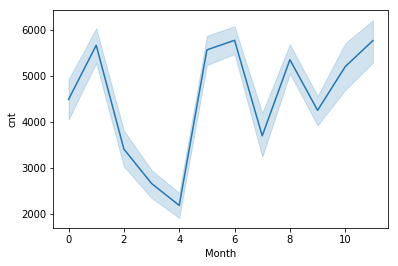

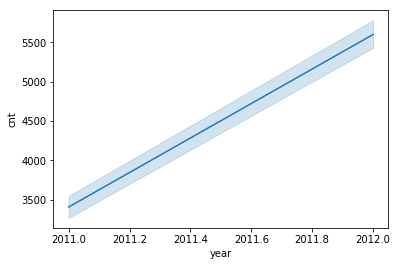

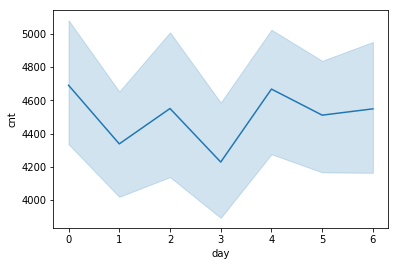

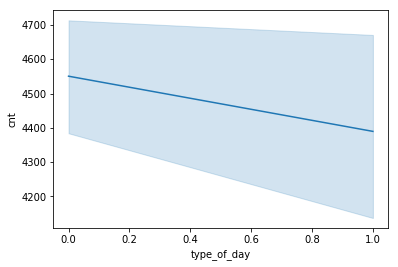

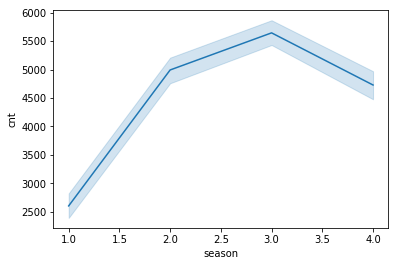

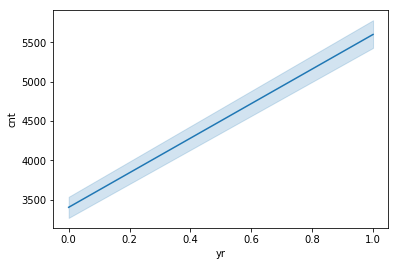

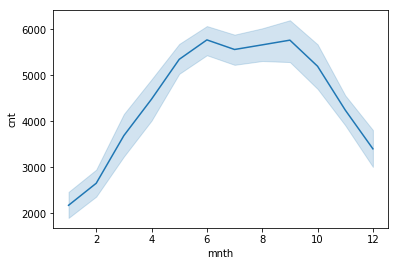

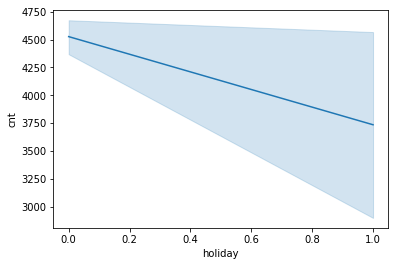

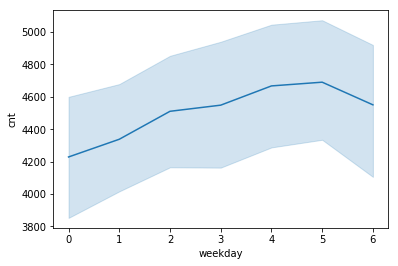

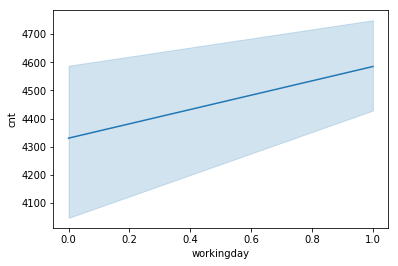

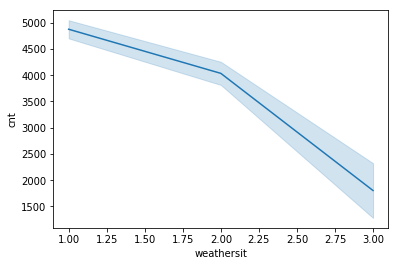

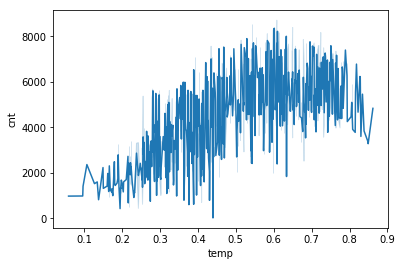

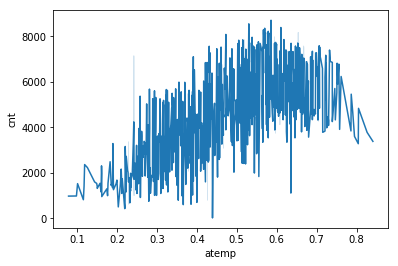

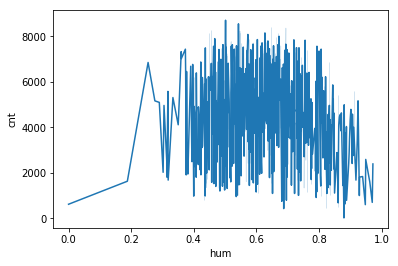

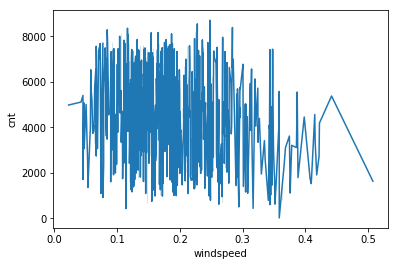

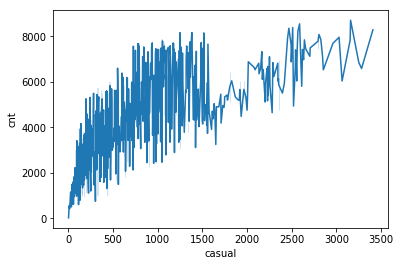

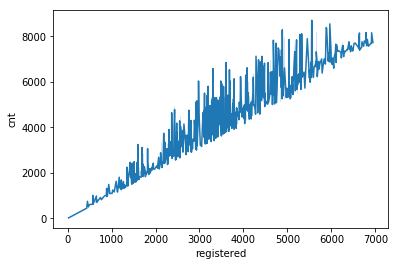

In [29]:
attr=list(df_final.columns[:-1])
plt.figure()
for val in attr:
    sns.lineplot(x=val,y='cnt',data=df_final)
    plt.show()

# 2.Bar Plots 

C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


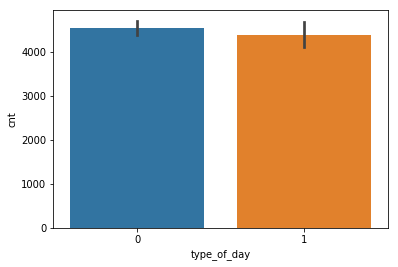

In [31]:
sns.barplot(x='type_of_day',y='cnt',data=df_final)
plt.show()

C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


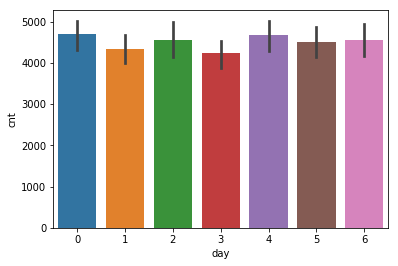

In [32]:
sns.barplot(x='day',y='cnt',data=df_final)
plt.show()

The number of rides is maxm at 4th working day

C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


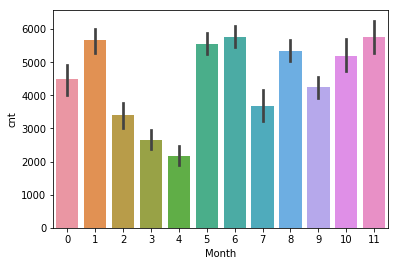

In [33]:
sns.barplot(x='Month',y='cnt',data=df_final)
plt.show()

January , Dec and June has highes number of counts

# CorRelation Matrix
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

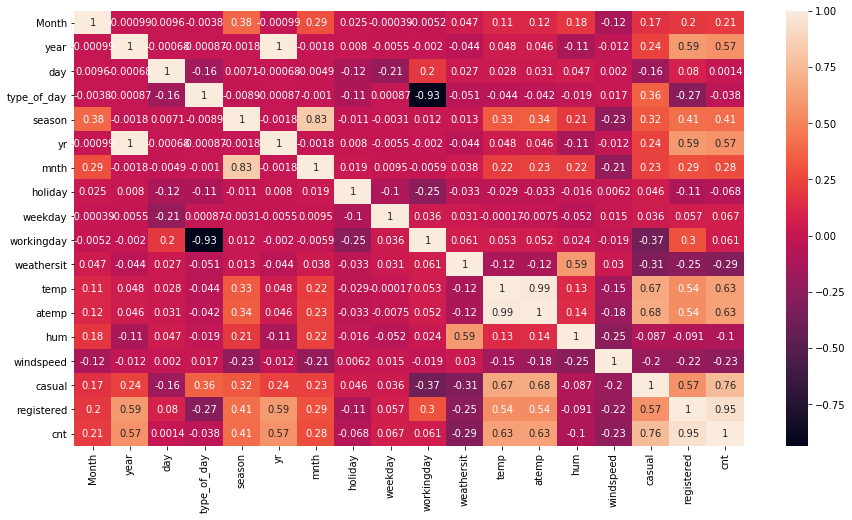

In [52]:
df_cor=df_final.corr()
plt.figure(figsize=(15,8))
sns.heatmap(df_cor , annot =True)

# Analysing the skewness

In [34]:
df_final.skew()

Month         -0.005631
year          -0.002742
day            0.004628
type_of_day    0.942160
season        -0.000384
yr            -0.002742
mnth          -0.008149
holiday        5.654224
weekday        0.002742
workingday    -0.793147
weathersit     0.957385
temp          -0.054521
atemp         -0.131088
hum           -0.069783
windspeed      0.677345
casual         1.266454
registered     0.043659
cnt           -0.047353
dtype: float64

# Using Log Transformation to remove the right/left skewness

In [46]:
for col in df_final.columns:
    if df_final.skew().loc[col]>0.55:
        df_final[col]=np.log1p(df_final[col])


In [49]:
df_final.skew()

Month         -0.005631
year          -0.002742
day            0.004628
type_of_day    0.942160
season        -0.000384
yr            -0.002742
mnth          -0.008149
holiday        5.654224
weekday        0.002742
workingday    -0.793147
weathersit     0.759529
temp          -0.054521
atemp         -0.131088
hum           -0.069783
windspeed      0.497220
casual        -0.915990
registered     0.043659
cnt           -0.047353
dtype: float64

From the above data we can see that skewness has been removed .
The skewness will also be treated by normalising the dataset

# Removing the Outliers using zscore

In [66]:
from  scipy.stats import zscore
zs=np.abs(zscore(df_final))
zs

array([[0.43686844, 1.00136893, 0.49854618, ..., 0.54109094, 1.9254707 ,
        1.81795256],
       [0.43686844, 1.00136893, 0.00205445, ..., 1.45427273, 1.91520896,
        1.91299949],
       [0.43686844, 1.00136893, 0.99914681, ..., 1.54042079, 1.5566892 ,
        1.62992496],
       ...,
       [1.01697894, 0.99863295, 0.49854618, ..., 1.26380953, 1.58683308,
        1.63405743],
       [1.01697894, 0.99863295, 0.00205445, ..., 0.44726878, 1.42649329,
        1.39902293],
       [1.01697894, 0.99863295, 0.99914681, ..., 0.26224557, 0.87620714,
        0.91707305]])

In [67]:
df=data[(zs<3).all(axis=1)]

In [68]:
print('shape of the data with outliers  ' ,data.shape)
print('shape of the data without  outliers  ' ,df.shape)

shape of the data with outliers   (731, 15)
shape of the data without  outliers   (702, 15)


In this section we have treated the outliers with the help of ZSCORE using threshold value as 3 ,The features which are having the zscore value > 3 are treated as outliers and have been removed.

Hence the new shape of the dataset after outliers removal is (702, 15). Now this will be our finalised Dataset for modelling.

# Separating input/output Variable

In [79]:
x=df_final.iloc[:,:-2]
y=df_final.iloc[:,-1]


# Analysing various Regression algorithm for the best modelling

Building a function to find the maximum r2-score corresponding to the random state

In [81]:
from sklearn.model_selection import train_test_split
from  sklearn.metrics import r2_score
def max_r2_score(model,x,y):
    random_state=np.arange(42,101)
    max_r2_score=0
    for r_state in random_state:
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=r_state)
        model.fit(train_x,train_y)
        pred = model.predict(test_x)
        r2_scr=r2_score(test_y,pred)
        #print('The accuracy for the {} is {}'.format(r_state,accuracy_score(test_y,pred_DT)))
        if r2_scr > max_r2_score:
            max_r2_score=r2_scr
            Final_r_state=r_state
    print('The maximum r2 score reached is {} at random state {}' .format(max_r2_score,Final_r_state))

# Performing Linear Regression

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
max_r2_score(lreg,x,y)

The maximum r2 score reached is 0.9133901367941676 at random state 77


In [83]:
from sklearn.model_selection import cross_val_score
print('mean cross_val_score',cross_val_score(lreg,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())

mean cross_val_score 0.6002421454398019
std deviation of cross_val_score 0.10198592996189824


# Performing Lasso Regression

In [85]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameter={"alpha":[0.001,0.01,0.1,1]}
gs=GridSearchCV(lsreg,parameter,cv=10)
gs.fit(x,y)
gs.best_params_

{'alpha': 1}

# Performing KNeighborsRegressor

In [86]:
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,30)}
knr=KNeighborsRegressor()
gs=GridSearchCV(knr,neighbors,cv=10)
gs.fit(x,y)
gs.best_params_

{'n_neighbors': 1}

In [88]:
knr=KNeighborsRegressor(n_neighbors=1)
max_r2_score(knr,x,y)
from sklearn.model_selection import cross_val_score
print('mean of cross_val_score',cross_val_score(knr,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(knr,x,y,cv=5,scoring='r2').std())

The maximum r2 score reached is 0.8088260765124101 at random state 73
mean of cross_val_score -1.9808265645589884
std deviation of cross_val_score 1.8210181793867513


# Performing DecisionTreeRegressor

In [89]:
from sklearn.tree import DecisionTreeRegressor
depth={'max_depth':range(1,30)}
dt=DecisionTreeRegressor()
gs=GridSearchCV(dt,depth,cv=10)
gs.fit(x,y)
gs.best_params_

{'max_depth': 12}

In [90]:
DT=DecisionTreeRegressor(max_depth=12)
max_r2_score(DT,x,y)
print('mean of cross_val_score',cross_val_score(DT,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(DT,x,y,cv=5,scoring='r2').std())

The maximum r2 score reached is 0.8789445310297219 at random state 65
mean of cross_val_score 0.17085889287543354
std deviation of cross_val_score 0.4110016862443268


# Performing Ridge Regressor

In [91]:
from sklearn.linear_model import Ridge
rig=Ridge()
parameter={"alpha":[0.001,0.01,0.1,1]}
gs=GridSearchCV(rig,parameter,cv=10)
gs.fit(x,y)
gs.best_params_

{'alpha': 1}

In [92]:
rig=Ridge(alpha=1)
max_r2_score(rig,x,y)
print('mean of cross_val_score',cross_val_score(rig,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(rig,x,y,cv=5,scoring='r2').std())

The maximum r2 score reached is 0.9119795166085448 at random state 77
mean of cross_val_score 0.611815429171816
std deviation of cross_val_score 0.09581494604376199


# Performing GradientBoostingRegressor

In [93]:
from sklearn.ensemble import GradientBoostingRegressor
parameter={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
gbr=GradientBoostingRegressor()
gs=GridSearchCV(gbr,parameter,cv=10)
gs.fit(x,y)
gs.best_params_

{'learning_rate': 0.1, 'n_estimators': 1000}

In [95]:
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=1000)
max_r2_score(gbr,x,y)
print('mean of cross_val_score',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())

The maximum r2 score reached is 0.9429093309859924 at random state 42
mean of cross_val_score 0.6352190245237772
std deviation of cross_val_score 0.09570169966695224


# Performing AdaBoostRegressor

In [97]:
from sklearn.ensemble import AdaBoostRegressor
parameter={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000],'base_estimator':[lreg,lsreg,DT,rig,knr]}
ad=AdaBoostRegressor()
gs=GridSearchCV(ad,parameter,cv=10)
gs.fit(x,y)
gs.best_params_

{'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=12,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'learning_rate': 1,
 'n_estimators': 500}

In [98]:
ad=AdaBoostRegressor(learning_rate=1,n_estimators=500,base_estimator=DT)
max_r2_score(ad,x,y)
print('mean of cross_val_score',cross_val_score(ad,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(ad,x,y,cv=5,scoring='r2').std())

The maximum r2 score reached is 0.9414473023184589 at random state 82
mean of cross_val_score 0.4589572934669327
std deviation of cross_val_score 0.23389922583067674


# Performing Support Vector Regressor

In [105]:
from  sklearn.svm import LinearSVR
parameter={'tol':[0.001,0.01,0.1,1]}
svr=LinearSVR()
gs=GridSearchCV(svr,parameter,cv=10)
gs.fit(x,y)
gs.best_params_

{'tol': 0.01}

In [112]:
svr=LinearSVR(tol=0.01)
max_r2_score(svr,x,y)
print('mean of cross_val_score',cross_val_score(svr,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(svr,x,y,cv=5,scoring='r2').std())

The maximum r2 score reached is 0.24168427699119743 at random state 91
mean of cross_val_score -4.917157447203712
std deviation of cross_val_score 4.0884750812569415


After performing several classification models on this data set and after analysing the performance matrix for all the models , it is concluded that GradientBoostingRegressor is giving the best results which are as follows :

The maximum r2 score reached is 0.9429093309859924 at random state 42

mean of cross_val_score 0.6352190245237772

std deviation of cross_val_score 0.09570169966695224

Therefore GradientBoostingRegressor is selected as our final model

# Final Modelling

From the all above model performed GradientBoostingRegressor model is giving us the best result , therefore selecting
GradientBoostingRegressor as final model

In [ ]:
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=1000)
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=82)
gbr.fit(train_x,train_y)
pred = gbr.predict(test_x)
r2_scr=r2_score(test_y,pred)

In [114]:
from sklearn.metrics import mean_squared_error
print('RMSE',np.sqrt(mean_squared_error(test_y,pred)))
print('r2_score',r2_score(test_y,pred))

RMSE 477.0855464950992
r2_score 0.9420664902266094


# Saving The Final Model

In [121]:
from sklearn.externals import joblib
joblib.dump(gbr,"gradient_boost_bike.pkl")

['gradient_boost_bike.pkl']

# Conclusion :-

This project is about the prediction of bike ride count in presence of various features.
The output class of the data set is real valued column , there it signifies  that the model for the prediction should be regressor type 

In this project we have performed Null value analysis ,Univariate analysis ,Bivariate analysis and several EDA techniques.

We have also treated the outliers using zscore < 3.

Several Regressor algorithms have been performed and by looking into performance matrix GradientBoostingRegressor is selected as final model which is best performing with this dataset.

At last we have saved the model